<center><font size = "10"> Week 7 - Connections <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 5
<br>Group member1: Camil Hamdane
<br>Group member2: Martim Simoes
<br>Group member3: Nathan Girard
    
        
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

<font size = "3">For this home work please use the new set of __FIVE__ good morpholgy files corresponding to your group number. 

# Optional: Connect all-to-all with random weights.


<font size='3'>Connect your five cells all to all (unidirectionally) with random weights, as it is done in tutorial 01 of this week, and display the connectivity matrix with the weights.

In [1]:
# Load usefull packages
%matplotlib inline

from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np
import math as m

--No graphics will be displayed.


In [2]:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()

    def build_morphology(self, filename):
        h.load_file("import3d.hoc")
        h.load_file("stdlib.hoc")
        # morph_reader = h.Import3d_Neurolucida3()
        morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(self)

    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75

        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        if hasattr(self, "apic"):
            for sec in self.apic:
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.dend:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.axon:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

In [3]:
# connect two cells with an exponential synapse at given locations
# returns the netcon
def connect(
    source,
    target,
    weight=None,
    delay=5,
    source_sec=None,
    source_neurite="axon",
    target_sec=None,
    target_neurite="dend",
):
    rng = np.random.default_rng()

    if weight is None:
        weight = rng.uniform()  # random weight

    target_neurite_ = getattr(target, target_neurite)
    if target_sec is None:
        target_sec = rng.integers(0, len(target_neurite_))  # random dendritic section

    source_neurite_ = getattr(source, source_neurite)
    if source_sec is None:
        source_sec = rng.integers(0, len(source_neurite_))  # random axonal section

    target_syn = h.ExpSyn(target_neurite_[target_sec](0.5))
    target.synapses.append(target_syn)  # store synapse

    netcon = h.NetCon(
        source_neurite_[source_sec](0.5)._ref_v,
        target_syn,
        sec=source_neurite_[source_sec],
    )
    netcon.weight[0] = weight
    netcon.delay = delay

    print(
        "Connected cells %s -> %s with weight %g and delay %g, from %s[%d] to %s[%d]"
        % (
            source.name,
            target.name,
            weight,
            delay,
            source_neurite,
            source_sec,
            target_neurite,
            target_sec,
        )
    )
    return netcon

# <font color= 'red'>Ex 1:</font> Connect your cells considering connection probability

<font size='3'>Connect your five cells as it is done in tutorial 02, considering the following connection probabilities between cell types:
<br> PC - PC: 60 %
<br> PC - Inh: 25 %
<br> Inh - PC: 39 %
<br> Inh - Inh: 37 %

<font size='3'> Show the results on a connection probability matrix and the connection weight matrix between the five cells. 

<font size='3'><font color= 'red'>[1.5 pt]

In [4]:
DATA_PATH = "Group5/"
EXT = ".swc"
Pyr_ = [Cell(DATA_PATH + "Pyr_0" + str(i) + EXT, "Pyr"+ str(i), "Pyr") for i in np.arange(1,4)]
Int_ = [Cell(DATA_PATH + "Int_0" + str(i) + EXT, "Int"+ str(i), "Int") for i in np.arange(1,3)]

cells = Pyr_ + Int_

In [5]:
# specify connection probabilites between cell types
conn_prob_matrix = np.zeros((2, 2))
conn_prob_matrix[0, 0] = 0.6  # PC to PC
conn_prob_matrix[0, 1] = 0.25  # PC to Inh
conn_prob_matrix[1, 0] = 0.39  # Inh to PC
conn_prob_matrix[1, 1] = 0.37  # Inh to Inh

In [6]:
netcons = []  # store all netcons

rng = np.random.default_rng()

# PC - PC:
if rng.random() < conn_prob_matrix[0, 0]:
    nc = connect(Pyr_[0], Pyr_[1])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 0]:
    nc = connect(Pyr_[0], Pyr_[2])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 0]:
    nc = connect(Pyr_[1], Pyr_[2])
    netcons.append(nc)
    
# PC - Inh:
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[0], Int_[0])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[0], Int_[1])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[1], Int_[0])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[1], Int_[1])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[2], Int_[0])
    netcons.append(nc)
if rng.random() < conn_prob_matrix[0, 1]:
    nc = connect(Pyr_[2], Int_[1])
    netcons.append(nc)
    
# Inh - PC:
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[0], Pyr_[0], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[0], Pyr_[1], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[0], Pyr_[2], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[1], Pyr_[0], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[1], Pyr_[1], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 0]:
    nc = connect(Int_[1], Pyr_[2], target_neurite="soma")
    netcons.append(nc)
    
# Inh - Inh:
if rng.random() < conn_prob_matrix[1, 1]:
    nc = connect(Int_[0], Int_[1], target_neurite="soma")
    netcons.append(nc)
if rng.random() < conn_prob_matrix[1, 1]:
    nc = connect(Int_[1], Int_[0], target_neurite="soma")
    netcons.append(nc)

Connected cells Pyr1 -> Int1 with weight 0.218116 and delay 5, from axon[72] to dend[21]
Connected cells Int1 -> Pyr1 with weight 0.0305124 and delay 5, from axon[38] to soma[0]
Connected cells Int2 -> Pyr1 with weight 0.718837 and delay 5, from axon[88] to soma[0]
Connected cells Int2 -> Pyr2 with weight 0.0242698 and delay 5, from axon[57] to soma[0]
Connected cells Int2 -> Pyr3 with weight 0.394629 and delay 5, from axon[215] to soma[0]
Connected cells Int1 -> Int2 with weight 0.29549 and delay 5, from axon[88] to soma[0]
Connected cells Int2 -> Int1 with weight 0.722459 and delay 5, from axon[87] to soma[0]


In [7]:
stim_cell = Pyr_[1]
stim_syn = h.ExpSyn(stim_cell.dend[20](0.5))
stim = h.NetStim()  # Make a new stimulator
ncstim = h.NetCon(stim, stim_syn)  # Connect stimulator to synapse

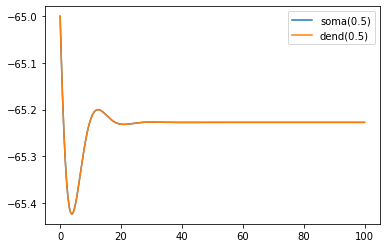

In [14]:
stim.number = 10  # Number of spikes (average)
stim.start = 10  # First spike delay [ms]
ncstim.delay = 1  # NetCon ms
ncstim.weight[0] = 0.8  # NetCon weight

recording_cell = Pyr_[0]

soma_v = h.Vector().record(recording_cell.soma[0](0.5)._ref_v)
dend_v = h.Vector().record(recording_cell.dend[16](0.5)._ref_v)
t = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(100)
plt.plot(t, soma_v, label="soma(0.5)")
plt.plot(t, dend_v, label="dend(0.5)")
plt.legend()
plt.show()

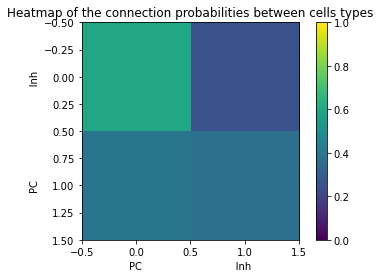

In [26]:
plt.imshow(conn_prob_matrix, cmap="viridis", vmin=0.0, vmax=1.0)
plt.title("Heatmap of the connection probabilities between cells types")
plt.xlabel("PC" + " ".ljust(30) + "Inh")
plt.ylabel("PC" + " ".ljust(30) + "Inh")
plt.colorbar()

# <font color= 'red'>Ex 2:</font>  Distribution of contacts: Convergence Matrix

<font size='3'>

Considering the following mean contact points between cell types: 
- PC_axon - PC_basal: 6
- PC_axon - PC_apical: 1
- PC_axon - Inh_basal: 2
- Inh_axon - PC_soma: 4
- Inh_axon - PC_basal: 3
- Inh_axon - Inh_soma: 5
- Inh_axon - Inh_basal: 1


Following and expanding the implementation from Tutorial 3: connect the neurons by selecting the specific contact points. The connections should follow a __normal distribution__ with the mean value per connection specified by the above values. 
Show the results on a __convergence__ matrix (how many contacts each of the cells receives from the others). 

Stimulate the connected neurons and briefly interpret the relationship between the number of connections and your simulation results.

<font color= 'red'><font size='3'>[2 pts] 

# <font color='red'>Ex 3:</font> Real Connectivity Rules

<font size='3'>
    
Read the articles uploaded with this homework (Markram_1997.pdf and Gupta_2000.pdf). 

Imagine that you have to build a network with your five cells (3 pyramidals and 2 GABAergic interneurons) from the rat somatosensory cortex. Extract from the papers the data that you would need to connect your cells (connectivity rules). 
Enumerate the data chosen to connect your cells. Make sure to read the papers thoroughly and extract all of the connectivity information.  
    
Using and modifying (if needed) the code from the tutorials, connect your five cells in a more biological way using the connectivity rules found in the papers. Visualize the results of the resulting connectivity.    
    
    
<font size='3'><font color= 'red'>[2.5 pts]